## Comparing Time Execution of Quick Sort and Merge Sort Algorithms 

Both merge sort and quicksort operate with a time complexity of O(n log n), a notable improvement over O(n^2). It's crucial to highlight that the efficiency of quicksort heavily depends on the pivot choice. In instances of suboptimal pivot selection, the worst-case time complexity may escalate to O(n^2). Emphasizing the pivotal role of a well-chosen pivot is essential for optimizing the overall efficiency of the quicksort algorithm.

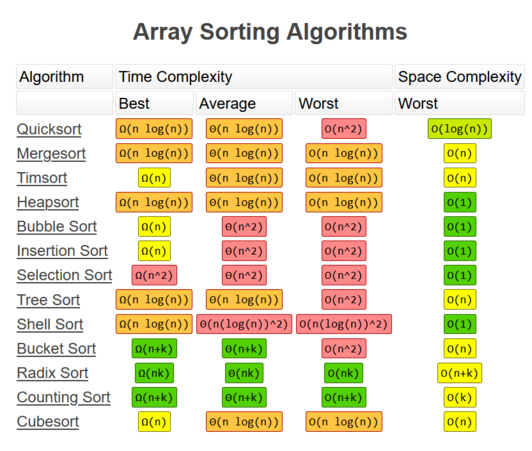

In [17]:
import sys
import time

#### *Timer Function*

In [18]:
def set_timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        time_passed = end - start
        print(f'The function {func.__name__} took {time_passed} seconds.')
        return result
    return wrapper

### *Merge Sort*

In [19]:
@set_timer
def merge_sort(A):
    merge_sort_2(A, 0, len(A) - 1)

def merge_sort_2(A, first, last):
    if first < last:
        middle = (first + last)//2
        merge_sort_2(A, first, middle)
        merge_sort_2(A, middle + 1, last)
        merge(A, first, middle, last)

def merge(A, first, middle, last):
    left = A[first:middle + 1]
    right = A[middle + 1:last + 1]
    left.append(sys.maxsize)
    right.append(sys.maxsize)
    top_right = top_left = 0

    for k in range(first, last + 1):
        if left[top_left] < right[top_right]:
            A[k] = left[top_left]
            top_left += 1
        else:
            A[k] = right[top_right]
            top_right += 1

### *Quick Sort*

In [20]:
@set_timer
def quicksort(A):
    sort(A, 0, len(A) - 1)

def partition(A, low, hi):
    pivot_index = get_pivot(A, low, hi)
    pivot_value = A[pivot_index]
    A[pivot_index], A[low] = A[low], A[pivot_index]
    border = low

    for i in range(low, hi + 1):
        if A[i] < pivot_value:
            border += 1
            A[i], A[border] = A[border], A[i]
    A[low], A[border] = A[border], A[low]

    return border

def get_pivot(A, low, hi):
    """Pivot is the median of three values"""
    mid = (low + hi) // 2
    pivot = hi
    if A[low] < A[mid]:
        if A[mid] < A[hi]:
            pivot = mid
    elif A[low] < A[hi]:
        pivot = low
    return pivot

def sort(A, low, hi):
    if low < hi:
        border = partition(A, low, hi)
        sort(A, low, border - 1)
        sort(A, border + 1, hi)

### *Comparison*

In [34]:
import random
A = random.sample(range(0, 5000), 1000)
B = random.sample(range(0, 5000), 1000)

merge_sort(A)
#print(A)

quicksort(B)
#print(B)


The function merge_sort took 0.002998828887939453 seconds.
The function quicksort took 0.002009153366088867 seconds.
